# Application Project Milestone 1

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import RobustScaler
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold, cross_val_score
from sklearn.linear_model import Ridge # regularized linear regression
from sklearn.ensemble import RandomForestRegressor # random forest regressor
from sklearn.neural_network import MLPRegressor # neural network regressor
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from scipy.stats import ttest_rel # paired t-test

## 2. Data Preprocessing

### 2.1. Error and Missing Value Detection

In [3]:
# Load the dataset
file_path = "train.csv"
df = pd.read_csv(file_path)

# Show the size of the dataset
print(df.shape)

# Display basic information about the dataset
df.info()

(8250, 41)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8250 entries, 0 to 8249
Data columns (total 41 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   acc_rate          8250 non-null   int64  
 1   track             8250 non-null   int64  
 2   m                 8250 non-null   float64
 3   n                 8250 non-null   float64
 4   current_pitch     8250 non-null   float64
 5   current_roll      8250 non-null   float64
 6   absoluate_roll    8250 non-null   int64  
 7   climb_delta       8250 non-null   int64  
 8   roll_rate_delta   8250 non-null   float64
 9   climb_delta_diff  8250 non-null   float64
 10  time1             8250 non-null   float64
 11  time2             8250 non-null   float64
 12  time3             8250 non-null   float64
 13  time4             8250 non-null   float64
 14  time5             8250 non-null   float64
 15  time6             8250 non-null   float64
 16  time7             8250 non-null

In [4]:
# Check for missing values
missing_values = df.isnull().sum()

# Sum up the missing values
missing_values.sum()

0

In [5]:
# Check for duplicate rows
duplicate_rows = df.duplicated().sum()
print(duplicate_rows)

0


In [6]:
# Drop the outliers using Z-score
z_scores = np.abs(stats.zscore(df))
threshold = 5
outliers = np.where(z_scores > threshold)
df = df.drop(outliers[0])
print(df.shape)

(7917, 41)


In [7]:
# Show all name of features
print(df.columns)

Index(['acc_rate', 'track', 'm', 'n', 'current_pitch', 'current_roll',
       'absoluate_roll', 'climb_delta', 'roll_rate_delta', 'climb_delta_diff',
       'time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8',
       'time9', 'time10', 'time11', 'time12', 'time13', 'time14',
       'time1_delta', 'time2_delta', 'time3_delta', 'time4_delta',
       'time5_delta', 'time6_delta', 'time7_delta', 'time8_delta',
       'time9_delta', 'time10_delta', 'time11_delta', 'time12_delta',
       'time13_delta', 'time14_delta', 'omega', 'set', 'target'],
      dtype='object')


### 2.2 Split the Training and Test Sets

In [8]:
# Separate features and target
X = df.iloc[:, :-1]  # First 40 columns (features)
y = df.iloc[:, -1]   # Last column (target)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=123)

print(type(X_train))
print(type(X_test))

# Add the column names to the training and testing sets
X_train.columns = df.columns[:-1]
X_test.columns = df.columns[:-1]

<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


### 2.3. Standardization or Normalization

In [9]:
# # Standard scaling
# scaler = StandardScaler()
# # Min-Max scaling
# scaler = MinMaxScaler()
# # Robust scaling
# scaler = RobustScaler()

# # Standard scaling
# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_test = scaler.transform(X_test)

In [10]:
# features, including acc_rate, track, n, current_pitch, current_roll, climb_delta, roll_rate_delta, climb_delta_diff, will use standard scaler
# features, including m, absolute_roll, 'time1', 'time2', 'time3', 'time4', 'time5', 'time6', 'time7', 'time8', 'time9', 'time10', 'time11', 'time12', 'time13', 'time14', omega, set, will use robust scaler
# features, including 'time1_delta', 'time2_delta', 'time3_delta', 'time4_delta', 'time5_delta', 'time6_delta', 'time7_delta', 'time8_delta', 'time9_delta', 'time10_delta', 'time11_delta', 'time12_delta', 'time13_delta', 'time14_delta', wil use minmax scaler

standard_scaler_features = ['acc_rate', 'track', 'n', 'current_pitch', 'current_roll', 
                            'climb_delta', 'roll_rate_delta', 'climb_delta_diff']

robust_scaler_features = ['m', 'absoluate_roll', 'time1', 'time2', 'time3', 'time4', 'time5', 
                          'time6', 'time7', 'time8', 'time9', 'time10', 'time11', 'time12', 
                          'time13', 'time14', 'omega', 'set']

minmax_scaler_features = ['time1_delta', 'time2_delta', 'time3_delta', 'time4_delta', 
                          'time5_delta', 'time6_delta', 'time7_delta', 'time8_delta', 
                          'time9_delta', 'time10_delta', 'time11_delta', 'time12_delta', 
                          'time13_delta', 'time14_delta']

In [11]:
# Standardize different features using ColumnTransformer
column_trans = ColumnTransformer([
    ("standard", StandardScaler(), standard_scaler_features),
    ("robust", RobustScaler(), robust_scaler_features),
    ("minmax", MinMaxScaler(feature_range=(-1,1)), minmax_scaler_features)
])

# Standardize the training and testing sets
X_train = column_trans.fit_transform(X_train)
X_test = column_trans.fit_transform(X_test)

print(type(X_train))
print(type(X_test))

# Transfer back to pandas.core.frame.DataFrame and drop the column names
X_train = pd.DataFrame(X_train)
X_test = pd.DataFrame(X_test)

print(type(X_train))
print(type(X_test))

<class 'numpy.ndarray'>
<class 'numpy.ndarray'>
<class 'pandas.core.frame.DataFrame'>
<class 'pandas.core.frame.DataFrame'>


In [12]:
# Store X_train and X_test to csv files
X_train.to_csv('./datasets/X_train.csv', index=False)
X_test.to_csv('./datasets/X_test.csv', index=False)
y_train.to_csv('./datasets/y_train.csv', index=False)
y_test.to_csv('./datasets/y_test.csv', index=False)

## 3. Baseline Models

In [13]:
# Define parameter grids for each model
param_grid_ridge = {'alpha': [0.1, 1.0, 10.0]}
param_grid_rf = {'n_estimators': [50, 100, 150, 200], 'max_depth': [None, 10, 20, 30]}
param_grid_mlp = {
    'hidden_layer_sizes': [(50,), (50, 50), (50, 50, 50), (50, 50, 50, 50)],
    'activation': ['relu', 'tanh'],
    'solver': ['adam', 'lbfgs']
}

In [14]:
# Perform Grid Search for Ridge Regression
ridge = Ridge()
grid_ridge = GridSearchCV(ridge, param_grid_ridge, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_ridge.fit(X_train, y_train)
best_ridge = grid_ridge.best_estimator_

In [15]:
# Perform Grid Search for Random Forest
rf = RandomForestRegressor(random_state=42)
grid_rf = GridSearchCV(rf, param_grid_rf, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_rf.fit(X_train, y_train)
best_rf = grid_rf.best_estimator_

In [16]:
# Perform Grid Search for Neural Network
mlp = MLPRegressor(random_state=42)
grid_mlp = GridSearchCV(mlp, param_grid_mlp, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)
grid_mlp.fit(X_train, y_train)
best_mlp = grid_mlp.best_estimator_

c:\Users\Zhy20\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)


In [17]:
# Store best models
models = {
    "Best Ridge Regression": best_ridge,
    "Best Random Forest Regressor": best_rf,
    "Best Neural Network": best_mlp
}

C:\Users\Zhy20\AppData\Local\Temp\ipykernel_18776\2139543776.py:21: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[0].set_xticklabels(df_performance.index, rotation=15)
C:\Users\Zhy20\AppData\Local\Temp\ipykernel_18776\2139543776.py:32: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_xticklabels(df_performance.index, rotation=15)


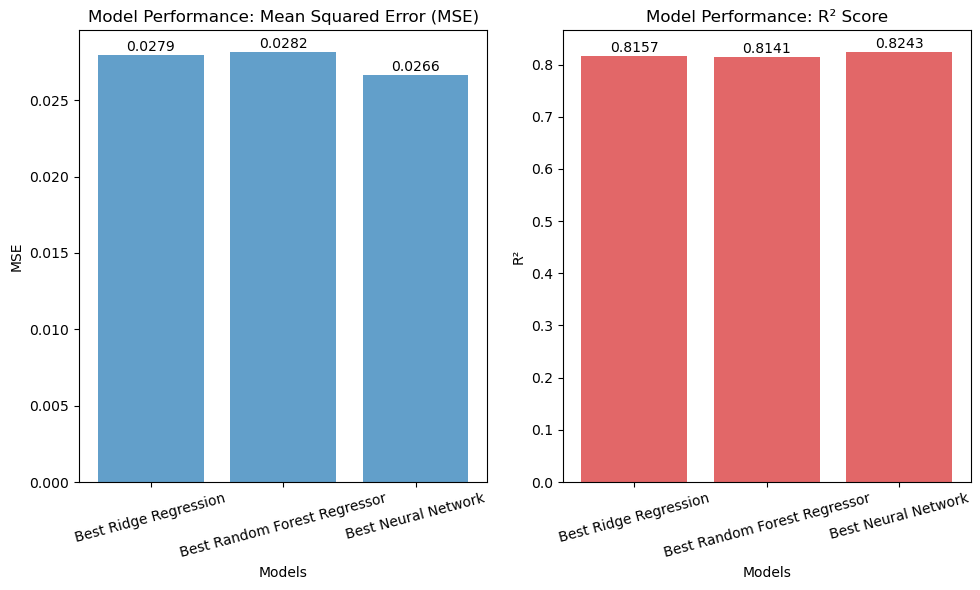

In [18]:
# Compute MSE and R²
performance = {}
for name, model in models.items():
    y_pred = model.predict(X_test)
    performance[name] = {
        "MSE": mean_squared_error(y_test, y_pred),
        "R2": r2_score(y_test, y_pred)
    }

# Convert to DataFrame
df_performance = pd.DataFrame(performance).T

# Create subplots (side-by-side)
fig, axes = plt.subplots(1, 2, figsize=(10, 6))

# MSE bar chart
axes[0].bar(df_performance.index, df_performance["MSE"], color="tab:blue", alpha=0.7)
axes[0].set_xlabel("Models")
axes[0].set_ylabel("MSE")
axes[0].set_title("Model Performance: Mean Squared Error (MSE)")
axes[0].set_xticklabels(df_performance.index, rotation=15)

# Display values on bars
for i, v in enumerate(df_performance["MSE"]):
    axes[0].text(i, v + 0.01 * max(df_performance["MSE"]), f"{v:.4f}", ha='center', fontsize=10)

# R² bar chart
axes[1].bar(df_performance.index, df_performance["R2"], color="tab:red", alpha=0.7)
axes[1].set_xlabel("Models")
axes[1].set_ylabel("R²")
axes[1].set_title("Model Performance: R² Score")
axes[1].set_xticklabels(df_performance.index, rotation=15)

# Display values on bars
for i, v in enumerate(df_performance["R2"]):
    axes[1].text(i, v + 0.01 * max(df_performance["R2"]), f"{v:.4f}", ha='center', fontsize=10)

# Adjust layout
plt.tight_layout()
plt.show()
# Save the figure
fig.savefig("./images/model_performance.png")

In [22]:
# Perform k-fold cross-validation and compute in-sample & out-of-sample errors
kf = KFold(n_splits=5, shuffle=True, random_state=42)

# Loss function: Mean Squared Error (MSE)
# Justification: 
# - Penalizes large errors more than MAE.
# - Differentiable, suitable for Neural Networks.
# - Standard for regression tasks.

errors_in_sample = {}
errors_out_sample = {}

for name, model in models.items():
    in_sample_scores = cross_val_score(model, X_train, y_train, cv=kf, scoring="neg_mean_squared_error")
    out_sample_scores = cross_val_score(model, X_test, y_test, cv=kf, scoring="neg_mean_squared_error")

    errors_in_sample[name] = -in_sample_scores  # Convert negative MSE to positive values
    errors_out_sample[name] = -out_sample_scores

# Convert errors to arrays for statistical tests
ridge_in, rf_in, mlp_in = errors_in_sample["Best Ridge Regression"], errors_in_sample["Best Random Forest Regressor"], errors_in_sample["Best Neural Network"]
ridge_out, rf_out, mlp_out = errors_out_sample["Best Ridge Regression"], errors_out_sample["Best Random Forest Regressor"], errors_out_sample["Best Neural Network"]

# Paired t-tests for In-Sample Errors
t_stat_in_ridge_rf, p_val_in_ridge_rf = ttest_rel(ridge_in, rf_in)
t_stat_in_ridge_mlp, p_val_in_ridge_mlp = ttest_rel(ridge_in, mlp_in)
t_stat_in_rf_mlp, p_val_in_rf_mlp = ttest_rel(rf_in, mlp_in)

# Paired t-tests for Out-of-Sample Errors
t_stat_out_ridge_rf, p_val_out_ridge_rf = ttest_rel(ridge_out, rf_out)
t_stat_out_ridge_mlp, p_val_out_ridge_mlp = ttest_rel(ridge_out, mlp_out)
t_stat_out_rf_mlp, p_val_out_rf_mlp = ttest_rel(rf_out, mlp_out)


c:\Users\Zhy20\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Zhy20\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
  self.n_iter_ = _check_optimize_result("lbfgs", opt_res, self.max_iter)
c:\Users\Zhy20\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:546: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITE

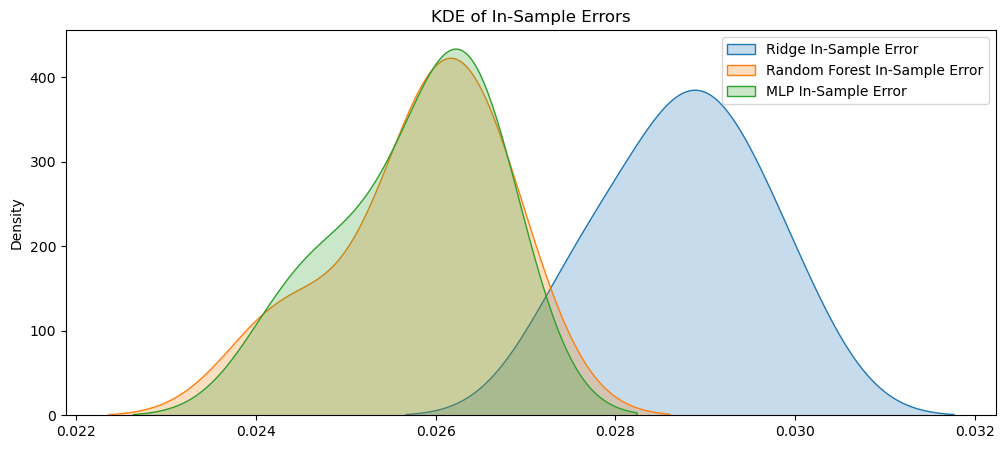

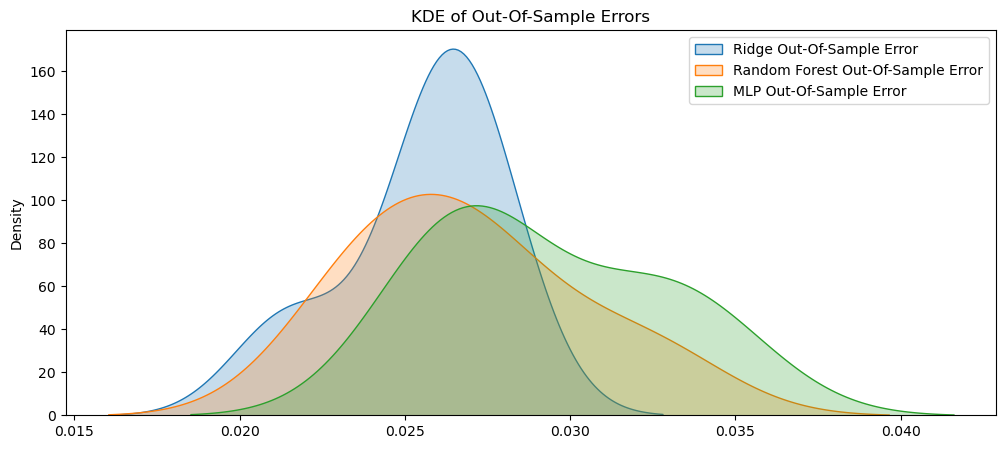

In [23]:
# KDE plots for in-sample errors
plt.figure(figsize=(12, 5))
sns.kdeplot(ridge_in, label='Ridge In-Sample Error', fill=True)
sns.kdeplot(rf_in, label='Random Forest In-Sample Error', fill=True)
sns.kdeplot(mlp_in, label='MLP In-Sample Error', fill=True)
plt.legend()
plt.title("KDE of In-Sample Errors")
plt.savefig("./images/kde_in_sample_errors.png")
plt.show()

# KDE plots for out-of-sample errors
plt.figure(figsize=(12, 5))
sns.kdeplot(ridge_out, label='Ridge Out-Of-Sample Error', fill=True)
sns.kdeplot(rf_out, label='Random Forest Out-Of-Sample Error', fill=True)
sns.kdeplot(mlp_out, label='MLP Out-Of-Sample Error', fill=True)
plt.legend()
plt.title("KDE of Out-Of-Sample Errors")
plt.savefig("./images/kde_out_sample_errors.png")
plt.show()

In [24]:
# Display t-test results
t_test_results = {
    "Paired t-test (In-Sample)": {
        "Ridge vs Random Forest": (t_stat_in_ridge_rf, p_val_in_ridge_rf),
        "Ridge vs MLP": (t_stat_in_ridge_mlp, p_val_in_ridge_mlp),
        "Random Forest vs MLP": (t_stat_in_rf_mlp, p_val_in_rf_mlp),
    },
    "Paired t-test (Out-of-Sample)": {
        "Ridge vs Random Forest": (t_stat_out_ridge_rf, p_val_out_ridge_rf),
        "Ridge vs MLP": (t_stat_out_ridge_mlp, p_val_out_ridge_mlp),
        "Random Forest vs MLP": (t_stat_out_rf_mlp, p_val_out_rf_mlp),
    }
}

t_test_results


{'Paired t-test (In-Sample)': {'Ridge vs Random Forest': (8.326790753844145,
   0.0011365678915968265),
  'Ridge vs MLP': (19.078930338043442, 4.4465456451942767e-05),
  'Random Forest vs MLP': (0.12023062560389164, 0.9100975640430402)},
 'Paired t-test (Out-of-Sample)': {'Ridge vs Random Forest': (-1.0022867745590287,
   0.37292031889411437),
  'Ridge vs MLP': (-1.646927218509418, 0.17491836360085694),
  'Random Forest vs MLP': (-0.9438834049963274, 0.39867396325426885)}}